<a href="https://colab.research.google.com/github/efemeryczny/network_analysis/blob/main/testowanie_hipotez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
wig_banki_table = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/hipotezy/akcjonariat_banki_.xlsx')
wig_banki_table

,Lp,akcjonariusz,ownership,wartosc,symbol,spolka
0,1,Citibank Overseas Investment Corporation,0.7500,7.760000e+09,BHW,HANDLOWY
1,1,ING Bank NV,0.7500,1.660000e+10,ING,INGBSK
2,1,Commerzbank AG,0.6917,1.090000e+10,MBK,MBANK
3,1,Banco Santander SA,0.6741,2.390000e+10,SPL,Santander Bank Polska SA
4,1,BNP Paribas SA,0.6331,4.790000e+09,BNP,BNP Paribas SA
...,...,...,...,...,...,...
292,30,TFI Ipopema SA,0.0001,5.530000e+06,PKO,PKO Bank Polski SA
293,31,TFI Noble Funds SA,0.0001,3.230000e+06,PKO,PKO Bank Polski SA
294,30,TFI Rockbridge SA,0.0001,5.160000e+06,SPL,Santander Bank Polska SA
295,31,TFI BNP Paribas SA,0.0001,4.060000e+06,SPL,Santander Bank Polska SA


In [8]:
G = nx.from_pandas_edgelist(wig_banki_table, 'akcjonariusz',  'spolka',  create_using=nx.Graph() , edge_attr=True)

In [11]:
pagerank = nx.pagerank(G, alpha=0.80, weight='wartosc')
# Sort the PageRank dictionary by values in descending order
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the sorted PageRank values
for node, score in sorted_pagerank:
    print(f"Node: {node}, PageRank: {score}")

Node: PKO Bank Polski SA, PageRank: 0.07460794542227223
Node: Banco Santander SA, PageRank: 0.07339319302143398
Node: PEKAO, PageRank: 0.06004238520229405
Node: Santander Spain, PageRank: 0.04735886467442757
Node: Santander Bank Polska SA, PageRank: 0.037936662905222795
Node: INGBSK, PageRank: 0.03772751955145026
Node: MBANK, PageRank: 0.033622318567713506
Node: Skarb Panstwa, PageRank: 0.030157937913472557
Node: BNP Paribas SA, PageRank: 0.0296802475659094
Node: UNICREDIT, PageRank: 0.027661907825916317
Node: HANDLOWY, PageRank: 0.026980463855405964
Node: ING Bank NV, PageRank: 0.0262318211451308
Node: BOS, PageRank: 0.026165444559360426
Node: PZU SA, PageRank: 0.025231261490187167
Node: OFE Nationale-Nederlanden, PageRank: 0.02518245099429773
Node: Commerzbank AG, PageRank: 0.02377677821224724
Node: OFE Allianz Polska, PageRank: 0.022759864392327328
Node: MILLENNIUM, PageRank: 0.022386903427678552
Node: GETIN, PageRank: 0.021886237967943853
Node: ALIOR, PageRank: 0.02104365181127623


In [12]:
edgelist = nx.to_edgelist(G)
plt.figure(figsize=(25, 30))
min_value=0.1

# Get the unique values in the 'spolka' column
spolka_values = wig_banki_table['spolka'].unique()

<Figure size 2500x3000 with 0 Axes>

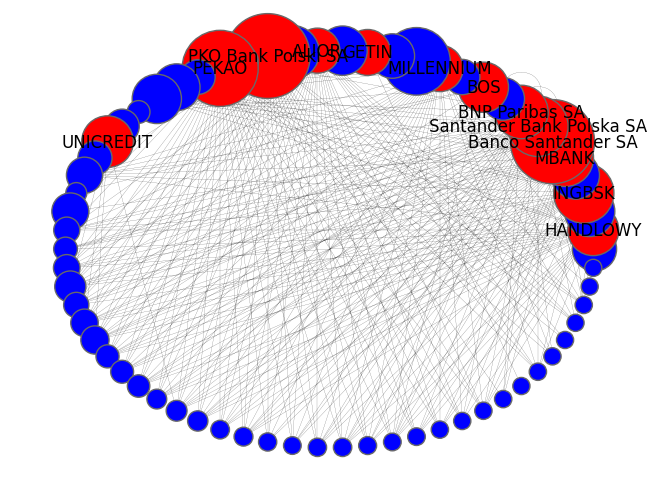

In [17]:
nx.draw_circular(G, with_labels=True, labels={node: node if node in spolka_values else '' for node in G},
                 node_color= ['red' if node in wig_banki_table['spolka'].values else 'blue' for node in G],
                 node_size = [pagerank[node] * 50000 for node in G],
                 width=[max(v[2]['wartosc']/1000000000000, min_value) for v in edgelist],
                 edgecolors='#696969')
plt.show()